In [1]:
import os #allows you to interface with underlying os system 
import urllib #allows you to work with URLs
import pandas as pd #data structures and data analysis 
import numpy as np #multi dimensional arrays and matrices, big math 
import geopandas as gpd # works with geospatial data (geometrys)
import matplotlib.pylab as plt #publication plotting for python 
%matplotlib inline 
import json #reading json files
import io
import requests
import shapely
from fiona.crs import from_epsg
import pysal as ps

In [2]:
urllib.request.urlretrieve("https://data.cityofnewyork.us/api/geospatial/cwiz-gcty?method=export&format=Shapefile", 'file.gz')

!unzip -u file.gz -d $PUIDATA

stringall = !zipinfo -1 file.gz
string = os.getenv("PUIDATA")+ "/"+stringall[1] # [1] 4 files in the zip, remember index starts at 0 

pumashp = gpd.GeoDataFrame.from_file(string)

#cleanupdata
for i in stringall: #This removes the path from the $PUIdata folder but it is still "there"
    delPath = os.getenv("PUIDATA")+ "/"+ i
    os.system('rm ' + delPath)

Archive:  file.gz
  inflating: /nfshome/mbh329/PUIdata/geo_export_3c91fde7-b7c9-4534-88b2-2023b5b66495.dbf  
  inflating: /nfshome/mbh329/PUIdata/geo_export_3c91fde7-b7c9-4534-88b2-2023b5b66495.shp  
  inflating: /nfshome/mbh329/PUIdata/geo_export_3c91fde7-b7c9-4534-88b2-2023b5b66495.shx  
  inflating: /nfshome/mbh329/PUIdata/geo_export_3c91fde7-b7c9-4534-88b2-2023b5b66495.prj  


In [3]:
!ls $PUIDATA #unsure why this lists this and not data in puidata folder 

201808-citibike-tripdata.csv
201808-citibike-tripdata.csv.zip
ACS_16_1YR_GCT2801.ST50_metadata.csv
ACS_16_1YR_GCT2801.ST50.txt
ACS_16_1YR_GCT2801.ST50_with_ann.csv
ACS_16_1YR_GCT2801.ST50.zip
aff_download_readme_ann.txt
busdata.txt
citibikecsv_05_16
citibikecsv_05_16.zip
citibikecsv_06_16
citibikecsv_06_16.zip
file.gz
geo_export_39b38f3a-92c8-4b9a-85fb-834057452b35.dbf
geo_export_39b38f3a-92c8-4b9a-85fb-834057452b35.prj
geo_export_39b38f3a-92c8-4b9a-85fb-834057452b35.shp
geo_export_39b38f3a-92c8-4b9a-85fb-834057452b35.shx
geo_export_4aa52bb9-9a40-4d4a-979d-bcdcbc146e69.dbf
geo_export_4aa52bb9-9a40-4d4a-979d-bcdcbc146e69.prj
geo_export_4aa52bb9-9a40-4d4a-979d-bcdcbc146e69.shp
geo_export_4aa52bb9-9a40-4d4a-979d-bcdcbc146e69.shx
geo_export_7977d278-c976-48c7-bcb3-34edfce91307.dbf
geo_export_7977d278-c976-48c7-bcb3-34edfce91307.prj
geo_export_7977d278-c976-48c7-bcb3-34edfce91307.shp
geo_export_7977d278-c976-48c7-bcb3-34edfce91307.shx
geo_export_7ec44b98-3237-43b1-815c-71e39d2dd155.dbf
geo_

In [4]:
pumashp.head(10)

,puma,shape_area,shape_leng,geometry
0,3701,9.792852e+07,53227.144461,POLYGON ((-73.89641133483133 40.90450452082026...
1,3702,1.889860e+08,106050.002302,"POLYGON ((-73.8442314689986 40.86942035096838,..."
2,3703,2.670137e+08,304071.257466,(POLYGON ((-73.78833349834532 40.8346671297593...
3,3704,1.062129e+08,47970.901277,"POLYGON ((-73.84792614069238 40.8713422330779,..."
4,4015,8.105438e+07,50007.415493,POLYGON ((-73.95374853778468 40.63858633758547...
5,4016,1.207135e+08,109477.751817,POLYGON ((-73.94405560932151 40.61199284173428...
6,3705,1.224951e+08,68657.316149,POLYGON ((-73.87359713633828 40.83979855593596...
7,3706,4.388687e+07,51799.404183,"POLYGON ((-73.88785196328796 40.8721141761279,..."
8,3707,4.228113e+07,37347.925798,"POLYGON ((-73.89735765412577 40.8587627349268,..."
9,4006,6.184965e+07,42555.996557,POLYGON ((-73.95526963654763 40.67012490485409...


In [5]:
pumashp.crs


{'init': 'epsg:4326'}

Text(0.5,0.01,'Figure 1.2: This is a base map of PUMA districts in NYC')

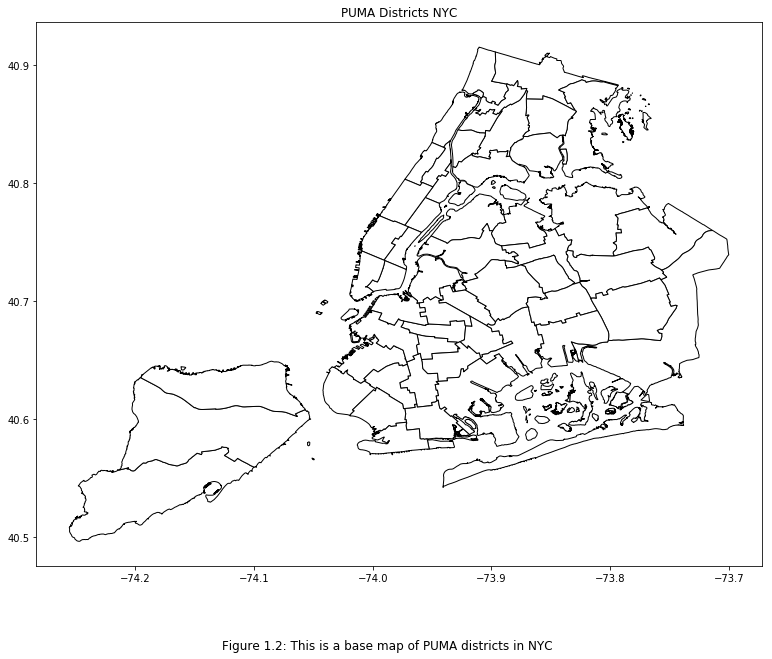

In [6]:
fig, ax = plt.subplots(figsize=(13,10))
ax.get_xaxis().set_visible(True) #takes away axis from the map x,y axis relates to Lat, Long 
ax.get_yaxis().set_visible(True) #latitude
pumashp.plot(color="white", edgecolor="black", lw=1, ax=ax)
plt.title("PUMA Districts NYC");

txt = "Figure 1.2: This is a base map of PUMA districts in NYC"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)


# Assignment 2

In [7]:
#reading in my api key saved in censusAPI.py as #this is fb55 code, not sure what it means
#myAPI = 'XXXXXXXXXXXXXXX'
# from censusAPI import myAPI

In [8]:
url = 'https://api.census.gov/data/2016/acs/acs1/variables.json'
resp = requests.request('GET', url)
aff1y = json.loads(resp.text)

In [9]:
#turning things into arrays to enable broadcasting
#Python3
affkeys = np.array(list(aff1y['variables'].keys()))
#Python2
#affkeys = np.array(aff1y['variables'].keys())

You need two features: total number of households, and number of households with broadband access

Broadband access is one of the B28002 keys. However there are many of those! Each variable has several observations associated to it: B28002 is all internet access data (broadband, dial up, none, ...), and for each of those you have the estimate (count, mean, median, percentage...), the margin of errors, and annotations. Those are identified by an appendix that begins with "_". Look carefully at the line of code below and its output. I am creating a list that contains the keys of the dictionary I created from the json file for all B28002 observations (rows that start with "B28002") that include the word "Broadband" in the description.

The syntax is a lost comprehension:

    as = \[a for a in listOfAs\] 

is simply a compact way to write

    as = \[\]
    for a in listOfAs:
        as.append(a)

In [10]:
#extracting variables of B28002 that contain "broadband"
[(k, aff1y['variables'][k]['label'])  for k in affkeys if k.startswith ("B28002") and 
 'Broadband' in aff1y['variables'][k]['label']]

[('B28002_007E',
  'Estimate!!Total!!With an Internet subscription!!Broadband such as cable, fiber optic or DSL'),
 ('B28002_004E',
  'Estimate!!Total!!With an Internet subscription!!Broadband of any type'),
 ('B28002_008E',
  'Estimate!!Total!!With an Internet subscription!!Broadband such as cable, fiber optic or DSL!!Broadband such as cable, fiber optic or DSL with no other type of Internet subscription')]

In [11]:
#keyword for the number of households
keyNhouseholds = 'B28002_001E'
aff1y['variables'][keyNhouseholds]

{'attributes': 'B28002_001M,B28002_001EA',
 'concept': 'PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD',
 'group': 'B28002',
 'label': 'Estimate!!Total',
 'limit': 0,
 'predicateType': 'int'}

In [12]:
#keyword for the number of households with broarband access
keyNBB = 'B28002_004E'
aff1y['variables'][keyNBB]

{'attributes': 'B28002_004M,B28002_004EA',
 'concept': 'PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD',
 'group': 'B28002',
 'label': 'Estimate!!Total!!With an Internet subscription!!Broadband of any type',
 'limit': 0,
 'predicateType': 'int'}

In [13]:
url =  "https://api.census.gov/data/2016/acs/acs1?get=" + keyNBB +\
",NAME&for=public%20use%20microdata%20area:*&in=state:36" + "&key=myAPI"
#get = keyNBB, 

## This will not work in the final version because i had to remove my api key in order to upload my notebook which is why you are seeing the error below, with your own api key it should work.

In [14]:
resp = requests.request('GET', url).content
pumaBB = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))

pumaBB

CParserError: Error tokenizing data. C error: Expected 1 fields in line 9, saw 3


In [ ]:
url = url =  "https://api.census.gov/data/2016/acs/acs1?get=" + keyNhouseholds +\
",NAME&for=public%20use%20microdata%20area:*&in=state:36" + "&key= myAPI"
#get = keyNBB, "

resp = requests.request('GET', url).content
pumaPP = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))


In [ ]:
pumaPP.head(5)

In [ ]:
pumaBB.drop("Unnamed: 4", axis=1, inplace= True) #axis 1 is columns
pumaPP.drop("Unnamed: 4", axis=1, inplace= True)

#dropping the unnamed:4 column from the dataframe

In [ ]:
pumaBB = pumaBB.merge(pumaPP) 

#merging dataframes BB + PP into pumaBB as instructed by fb55

In [ ]:
pumaBB['pcBB'] = pumaBB.B28002_004E/pumaBB.B28002_001E * 100

#formula for percentages of households w/ broadband 
# B28002_004/B28002_001 = # of houses with broadband total 

In [ ]:
pumaBB.head(5)

In [ ]:
file = os.getenv("PUIDATA") + "/ACS_16_1YR_GCT2801.ST50.zip"
os.system('unzip ' + file + ' -d $PUIDATA')
#os.system("unzip " + PUIdata + "/ACS_16_1YR_GCT2801.ST50.zip -d " + PUIdata)

In [ ]:
bbpc = pd.read_csv(os.getenv("PUIDATA") + "/ACS_16_1YR_GCT2801.ST50_with_ann.csv",
            usecols=["GCT_STUB.target-geo-id2","HC01","HC02"],skiprows=[1,2]) 

bbpc.head(5)

In [ ]:
bbpc.rename(columns={"GCT_STUB.target-geo-id2": "gid"}, inplace=True) #renaming columns \
# important 

In [ ]:
bbpc.head(5)

In [ ]:


#df = DataFrame(np.arange(10).reshape(5,2),columns=list('AB'))
#bbpc.gid = bbpc.gid.astype()
#bbpc.HC01 = bbpc.HC01.astype(np.int64)
#bbpc.HC02 = bbpc.HC02.astype(np.int64)
# df.column_name = df.column_name.astype(np.int64)



#bbpc.gid.astype(int, copy=True, errors='coerce')
#bbpc.HC01.astype(int, copy=True, errors='coerce') 
#bbpc.HC02.astype(int, copy=True, errors='coerce')
#bbpc.head(5)

In [ ]:
bbpc["gid"] = bbpc.gid - 3600000
bbpc.head(5)

In [ ]:
diff_ = pumaBB.merge(bbpc, right_on="gid", 
                     left_on="public use microdata area")[["pcBB", "HC01"]]

diff_["diff"] = np.abs(diff_["pcBB"] - diff_["HC01"].astype(float))

diff_.describe()

# Assignment 3 

In [ ]:
pumashp.dtypes
pumashp['puma'] = pumashp.puma.astype(int)

In [ ]:
pumashp.dtypes #dtypes tells you what the df is (str, int)

In [ ]:
pumashp = pumashp.merge(pumaBB, right_on="public use microdata area", 
                     left_on="puma")

In [ ]:
pumashp.head(1)

In [ ]:
#cp.choroplethNYC = pumashp

f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
pumashp.plot(column='pcBB',cmap='viridis',alpha=1,linewidth=0.1,ax=ax)
plt.title("NYC Broadband percentage by PUMA region");

txt = "Figure 3.1: This figure shows the percentage of broadband users by PUMA region in NYC"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)

# Assignment 4


In [ ]:
linknyc_pointloc = pd.read_csv("https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW7_fb55/linkNYClocations.csv")

### YOU MUST USE RAW github url NOT regular github url 

In [ ]:
linknyc_pointloc.head()


In [ ]:
# combine lat and lon to one column
linknyc_pointloc['lonlat']=list(zip(linknyc_pointloc.longitude,linknyc_pointloc.latitude))

# Create Point Geometry for based on lonlat column
linknyc_pointloc['geometry']=linknyc_pointloc[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))

linknyc_pointloc.head()

In [ ]:
 
linknyc_pointloc = gpd.GeoDataFrame(linknyc_pointloc)
#needed to add gpd. to define geodataframe

In [ ]:
linknyc_pointloc.crs = from_epsg(4326)
linknyc_pointloc.crs

In [ ]:
f, ax = plt.subplots(figsize=(10,10)) #size of your plot (matplotlib, not gpd)
ax.get_xaxis().set_visible(False) # sets if the axis' will be visible 
ax.get_yaxis().set_visible(False)

pumashp.plot(column='pcBB',cmap='bone',alpha=1,linewidth=0.1, ax=ax, scheme='Equal_interval',\
             edgecolor='black', legend=True, k=5) 

#column is the data you are mapping
#cmap is the mapping schema you will use, if you just use color= no variance in color
#ax=ax IS VERY IMPORTANT WHEN YOU ARE plotting, make sure to set both plots to ax
#scheme= codes the data into quantities(Q1,Q2)

linknyc_pointloc.plot(column='date_link_', cmap='YlOrRd', markersize=7, ax=ax)
plt.title("Link NYC locations within NYC PUMA regions");
                      
txt = "Figure 4.1: This map shows the percentage of broadband users by NYC PUMA region with\
an overlayed geodataframe of LINKNYC locations with a variance based on their installation date"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)
#cmap='viridis',alpha=1,
                  #linewidth=0.1,ax=ax, scheme="quantiles", legend=True, k=10

# Assignment 5

In [ ]:
acspopulation = 'B00001_001E' #defining what key we want to use 
url = "https://api.census.gov/data/2016/acs/acs1?get=" + acspopulation +\
",NAME&for=public%20use%20microdata%20area:*&in=state:36" + "&key=myAPI"


In [ ]:
resp = requests.request('GET', url).content
puma_pop = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))

In [ ]:
puma_pop.head()

In [ ]:
puma_pop.drop("Unnamed: 4", axis=1, inplace= True)

In [ ]:
puma_pop.head()

In [ ]:
puma_pop.rename(columns={"public use microdata area": "PUMA"}, inplace=True)

In [ ]:
puma_pop.head()

In [ ]:
linknyc_pointloc = linknyc_pointloc.to_crs(epsg=2263)
pumashp = pumashp.to_crs(epsg=2263)

#creating new datafram (ex. linknyc_pointloc_fin FROM linknyc_pointloc(alredy defined))\
#epsg 


In [ ]:
linknyc_pointloc = gpd.GeoDataFrame(linknyc_pointloc)
pumashp = gpd.GeoDataFrame(pumashp)


In [ ]:
linkpp = gpd.sjoin(linknyc_pointloc, pumashp)

In [ ]:
linkpp

In [ ]:
linkpp = gpd.sjoin(pumashp, linknyc_pointloc).groupby('puma')[['link_site']].count()

In [ ]:
pumashplc = pd.merge(pumashp, linkpp, how='left', left_on='puma', right_index=True)

#this is very confusing ASK ??????????????


In [ ]:
pumashplc.head(5)

In [ ]:
pumashplc["linkNYCp100p"] = pumashplc.link_site/pumashplc.B28002_001E * 100
pumashplc = pumashplc.fillna(0)
pumashplc["linkNYCp100p"].describe()

In [ ]:
pumashplc

In [ ]:
f, ax = plt.subplots(figsize=(10,10))

pumashplc.plot(column='linkNYCp100p', cmap='bone', edgecolor='grey', scheme="Equal_interval",k=10 ,lw=.1, legend=True, ax=ax)
#base map 

linknyc_pointloc.plot(cmap='YlOrRd', markersize=1, ax=ax, legend=True)
#point data of linknyc stations

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)


ax.set_title('Link Stations per 100 Residents', fontsize=15)


txt = "Figure 5.0:linkNYC locations overlayed on top of a choropleth of the number of LINKNYC stations per 100 people"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)
